## Install dependencies

### Check CUDA version

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


### Install dependencies


In [2]:
!pip3 install tokenizers==0.12.1 transformers==4.21.3 pandas==1.5.3 datasets==2.4.0 tensorflow==2.12
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.3 MB/s eta 0:00:00
INFO: pip is loo

# How do we make software understand language?

## Download Dutch dataset (news articles)

In [3]:
import os

In [4]:
if not os.path.isfile("dutch.csv"): 
  !wget https://raw.githubusercontent.com/tijsg/lm-tutorial/main/dutch.csv

--2023-05-26 06:50:52--  https://raw.githubusercontent.com/tijsg/lm-tutorial/main/dutch.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10965481 (10M) [text/plain]
Saving to: ‘dutch.csv’

dutch.csv           100%[===================>]  10.46M  --.-KB/s    in 0.06s   

2023-05-26 06:50:53 (180 MB/s) - ‘dutch.csv’ saved [10965481/10965481]



## Analogy with language tests
Fill in the missing word

## Encoding
Every string is already encoded character per character

In [5]:
for char in ("abcdefghijklmnopqrstuvwxyz"):
  print("UTF-8 code for char " + char + " is: " + str(ord(char)))

UTF-8 code for char a is: 97
UTF-8 code for char b is: 98
UTF-8 code for char c is: 99
UTF-8 code for char d is: 100
UTF-8 code for char e is: 101
UTF-8 code for char f is: 102
UTF-8 code for char g is: 103
UTF-8 code for char h is: 104
UTF-8 code for char i is: 105
UTF-8 code for char j is: 106
UTF-8 code for char k is: 107
UTF-8 code for char l is: 108
UTF-8 code for char m is: 109
UTF-8 code for char n is: 110
UTF-8 code for char o is: 111
UTF-8 code for char p is: 112
UTF-8 code for char q is: 113
UTF-8 code for char r is: 114
UTF-8 code for char s is: 115
UTF-8 code for char t is: 116
UTF-8 code for char u is: 117
UTF-8 code for char v is: 118
UTF-8 code for char w is: 119
UTF-8 code for char x is: 120
UTF-8 code for char y is: 121
UTF-8 code for char z is: 122


## Load in data

In [6]:
import pandas as pd

In [7]:
df_dutch = pd.read_csv("dutch.csv", delimiter=";")

In [8]:
df_dutch

,labels
0,Spanje is met ingang van vandaag voorzitter va...
1,Vijf werknemers van het omstreden Amerikaanse ...
2,Het Oud en Nieuwfeest op het Museumplein in Am...
3,President Obama heeft de eerste rapporten gekr...
4,In de hele wereld is het nieuwe jaar feestelij...
...,...
9973,Een Chinese trein heeft het snelheidsrecord ge...
9974,Een universiteit in de Amerikaanse staat Texas...
9975,In Brussel demonstreren tienduizenden mensen v...
9976,De NS wil het papieren spoorboekje afschaffen....


## Split by space

In [9]:
sentence = df_dutch.iloc[0]
sentence = sentence[0]

In [10]:
sentence.split(" ")[:10]

['Spanje',
 'is',
 'met',
 'ingang',
 'van',
 'vandaag',
 'voorzitter',
 'van',
 'de',
 'EU.']

## Tokenizers 
### Byte pair encoding

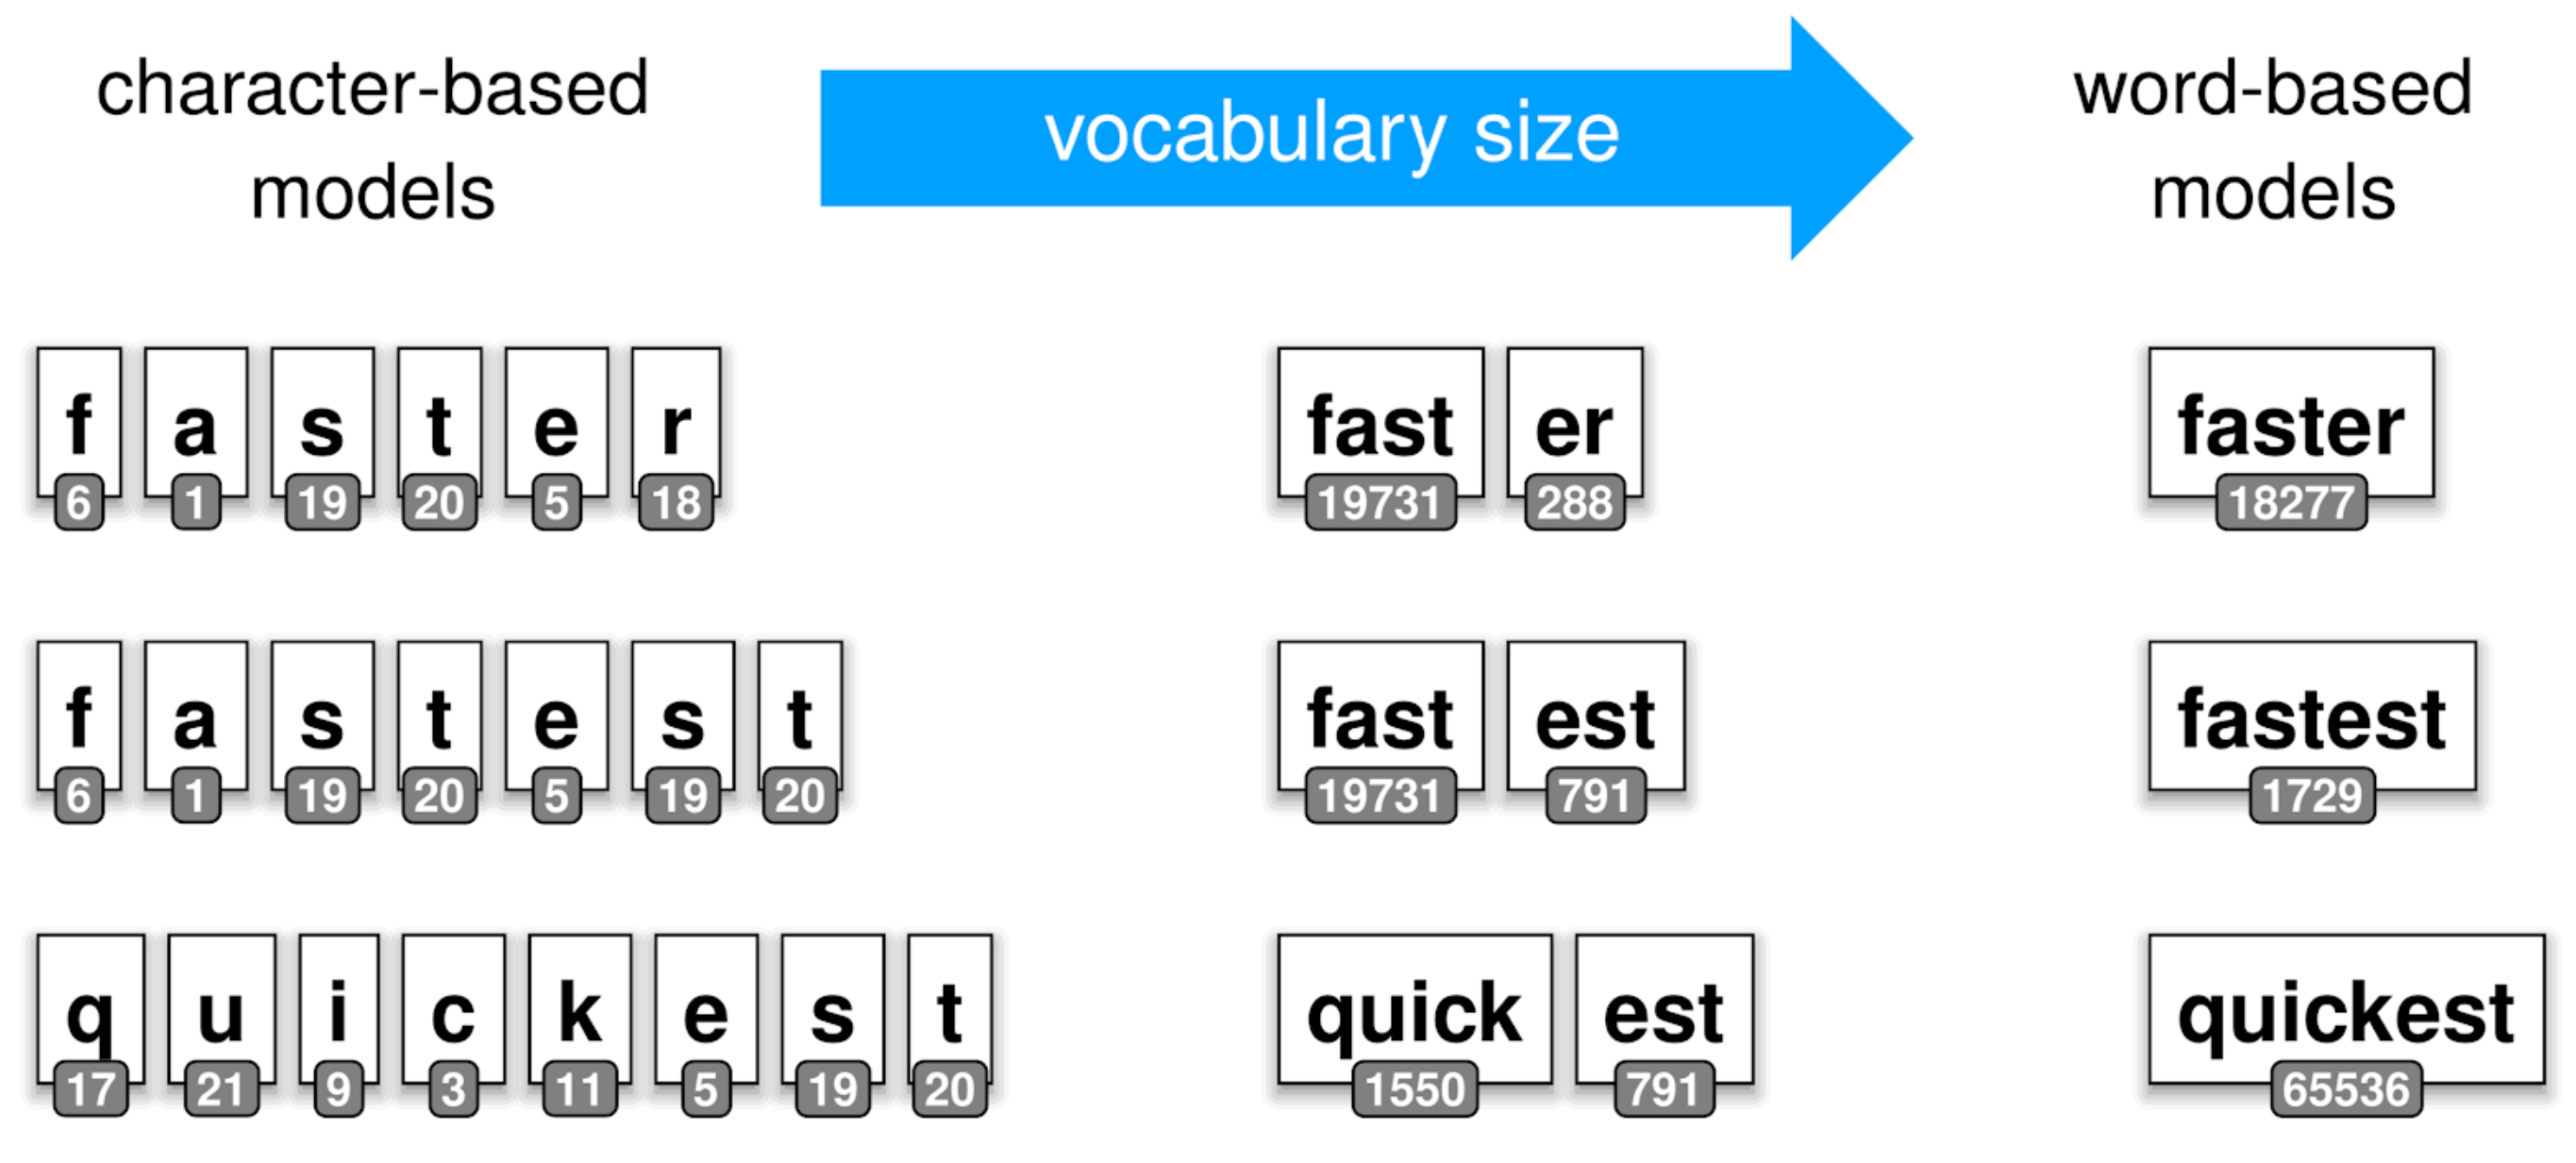

In [11]:
from tokenizers import ByteLevelBPETokenizer

tokenizer = ByteLevelBPETokenizer()

tokenizer.train(files="dutch.csv", vocab_size=50265, min_frequency=3, 
                show_progress=True,
                special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"])

In [12]:
import os

if not os.path.exists("tokenizer"): os.mkdir("tokenizer")
tokenizer.save_model("tokenizer")

['tokenizer/vocab.json', 'tokenizer/merges.txt']

In [13]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained("tokenizer", max_len=512)

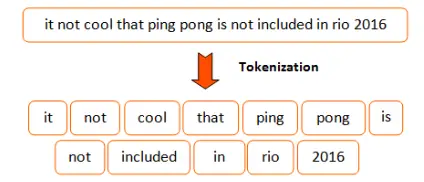

In [14]:
tokens = tokenizer.encode(sentence[:100])
print(sentence[:100])
print(tokens)

Spanje is met ingang van vandaag voorzitter van de EU. De Zweedse premier Fredrik Reinfeldt heeft he
[0, 17121, 321, 351, 8590, 284, 880, 2079, 284, 268, 2025, 18, 328, 4668, 1070, 10555, 1137, 17786, 402, 425, 2]


In [15]:
print(tokenizer.decode([0, 55, 84, 264, 546, 321, 351, 289, 75, 466, 284, 880, 329, 844, 472, 284, 268, 385, 57, 18, 328, 437, 461, 72, 347, 304, 848, 529, 300, 72, 86, 394, 426, 73, 266, 74, 389, 88, 402, 425, 2]))

<s>Spanje is met ingang van vandaag voorzitter van de EU. De Zweedse premier Fredrik Reinfeldt heeft he</s>


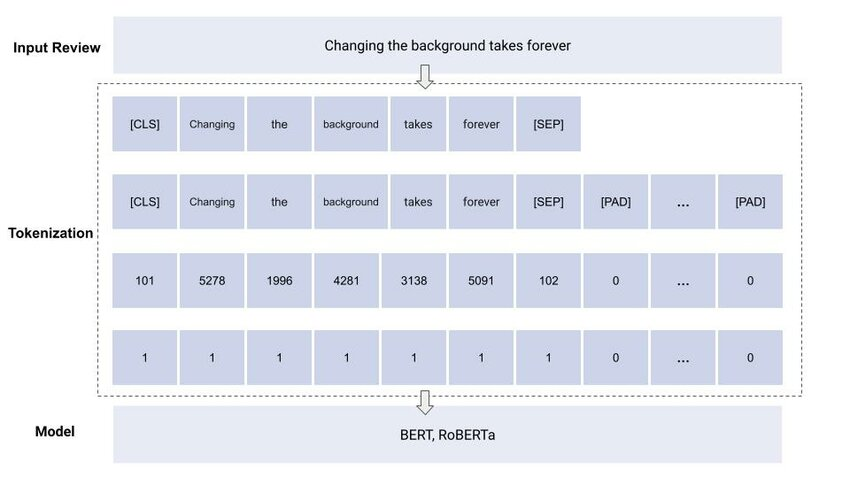

## Configure RoBERTa model

This is defined by a research team

In [16]:
from transformers import RobertaConfig
from transformers import RobertaForMaskedLM

# Set a configuration for our RoBERTa model
config = RobertaConfig(
    vocab_size=50265,
    max_position_embeddings=514,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)
# Initialize the model from a configuration without pretrained weights
model = RobertaForMaskedLM(config=config)
print('Num parameters: ',model.num_parameters())

Num parameters:  82170201


### Data collator to mask words with 15 percent probability

In [17]:
from transformers import DataCollatorForLanguageModeling

# Define the Data Collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15,
)

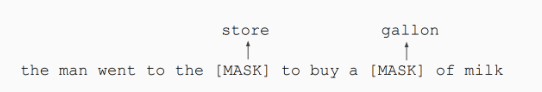

### Check if a GPU is available

In [18]:
import torch

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    c = torch.cuda.device_count()
    print(f"CUDA is available!\nNumber of gpu's detected: {c}" )
    print('Training on GPU ...\n\n')
    for i in range(c):
        print(f'Device name {i}== {torch.cuda.get_device_name(i)}')

CUDA is available!
Number of gpu's detected: 1
Training on GPU ...


Device name 0== Tesla T4


### Set up a tokenizer function to prepare for on-the-fly tokenizing

In [19]:
def encode(batch):
    return tokenizer(batch['labels'], padding="max_length", truncation=True, max_length=512,return_tensors="pt")

### Load in the dataset, this time using Hugging Face's "datasets" instead of "pandas"

In [20]:
from datasets import load_dataset
dataset = load_dataset("csv", data_files="dutch.csv", delimiter=";")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

/usr/local/lib/python3.10/dist-packages/datasets/download/streaming_download_manager.py:695: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-144099f73cfbce4c/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels'],
        num_rows: 9978
    })
})

### Shuffle the dataset, and do a train/test split with 70/30 ratio

In [22]:
dataset = dataset.shuffle(seed=42)
dataset = dataset["train"]
dataset = dataset.train_test_split(train_size=0.7)

### Check if data is loaded correctly

In [23]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels'],
        num_rows: 6984
    })
    test: Dataset({
        features: ['labels'],
        num_rows: 2994
    })
})

In [24]:
dataset["train"][100]

{'labels': 'De prijzen van koopwoningen zijn in augustus opnieuw gedaald. Ten opzichte van juli waren koopwoningen gemiddeld 0,2 procent goedkoper. Vergeleken met dezelfde maand een jaar eerder was de daling gemiddeld 0,4 procent, blijkt uit cijfers van het Centraal Bureau voor de Statistiek. Al sinds februari 2009 zijn de prijzen lager dan een jaar eerder, maar de prijsdaling is in de loop van dit jaar geleidelijk kleiner geworden. De prijs van vrijstaande huizen is vergeleken met augustus 2009 juist gestegen'}

In [25]:
dataset["test"][100]

{'labels': 'VS-minister Clinton heeft Noord-Korea opgeroepen zijn oorlogszuchtige beleid te staken. Clinton is in Zuid-Korea voor overleg over de oplopende spanningen op het Koreaanse schiereiland. Seoul houdt Pyongyang verantwoordelijk voor het zinken van een Zuid-Koreaans marineschip. Clinton noemt het bewijs overweldigend en zegt dat de wereld de plicht heeft om de provocatie krachtig maar afgewogen te beantwoorden. Seoul stapt naar de VN-Veiligheidsraad. Pyongyang spreekt de aantijging tegen en verbrak gisteren alle banden met het zuiden. Noord-Korea zegt dat maatregelen tegen het land tot oorlog leiden. '}

### Set up on-the-fly tokenizing/encoding

In [26]:
ds_train = dataset["train"]
ds_train.set_transform(encode)
ds_test = dataset["test"]
ds_test.set_transform(encode)

Now when fetching a sentence, it returns the tokens instead of the sentence

In [27]:
ds_train

Dataset({
    features: ['labels'],
    num_rows: 6984
})

In [28]:
ds_train[20]

{'input_ids': tensor([    0,   542,  1625,  5170, 10115,   402,   268,  1302,  2461,   268,
          3952,  7950,   284,   268,  6454,    18,   419,  1289,   581,   319,
           268,  1672,  1940,   420,   268,  3952, 30813,   790,   321,    18,
          1550,   268,  3952,   490, 10115,   880,  8520,  2782,  7045,    16,
           656, 22112,   309,  1496,   725,   637,  3583,    18,   328,  6454,
         21053,  1331,   852,   299, 42829,  3952,   338,   356,   299,  2551,
          7220,   307,   293, 10937,   284,   732,   457,   320,  8091,    18,
          4198,  3725,  6454,  7604,  1331,   852,   329,   293,  2862,   356,
           289,  3952,   320,   672,    18,   419,  2851, 27736,   329,   299,
          6029,   321,  6696,    18,   674,   637,    16,  2273,   293,  7220,
           284,  7350,  6915,   410, 29659,    18,   674,   637,  2857,    18,
             2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,   

### Set up the training parameters

In [29]:
from transformers import TrainingArguments, Trainer

if not os.path.exists("models"): os.mkdir("models")
if not os.path.exists("models/roberta"): os.mkdir("models/roberta")

training_args = TrainingArguments(
    output_dir='./models/roberta',
    overwrite_output_dir=True,
    evaluation_strategy = 'steps',
    num_train_epochs=5,
    learning_rate=1e-5,
    lr_scheduler_type="constant",
    weight_decay=0.01,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    save_steps=500,
    eval_steps=500,
    save_total_limit=3,
    ignore_data_skip=True,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    fp16=True
)
# Create the trainer for our model
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=ds_train,
    eval_dataset=ds_test,
    #prediction_loss_only=True,
)

Using cuda_amp half precision backend


### Start the training script

In [ ]:
trainer.train()
trainer.save_model("models/roberta/roberta_dutch")

# Load the model
## Load in the newly trained model

In [ ]:
from transformers import RobertaForMaskedLM
model = RobertaForMaskedLM.from_pretrained("models/roberta/roberta_dutch")

## Set up a script to check the model with masked words

In [ ]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model = model,
    tokenizer = tokenizer
)

### Test the model

In [ ]:
fill_mask("Hij doet zijn <mask> om goed te presteren.")

### Comparison with pretrained model

In [32]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("pdelobelle/robbert-v2-dutch-base")
model = AutoModelForMaskedLM.from_pretrained("pdelobelle/robbert-v2-dutch-base")

https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpub0xn_oh


storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/0e574c682eea0c331bacb169b024661d2c630bcc95fb929dffaecbc6e3d5e83e.b25ac1f3bc538e061573df45561f46b234ba553cd567a9a487bf0c20e09447b5
creating metadata file for /root/.cache/huggingface/transformers/0e574c682eea0c331bacb169b024661d2c630bcc95fb929dffaecbc6e3d5e83e.b25ac1f3bc538e061573df45561f46b234ba553cd567a9a487bf0c20e09447b5
https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp8x7tpi4n


storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/4dc1751f7036aa151e84b548c6c2a90c679132d8e7b35c81a217140ca5409f6a.45b4090752cbcdfa3b06574023ad242f1b2c25a31c6390b81325b2f43ee506ca
creating metadata file for /root/.cache/huggingface/transformers/4dc1751f7036aa151e84b548c6c2a90c679132d8e7b35c81a217140ca5409f6a.45b4090752cbcdfa3b06574023ad242f1b2c25a31c6390b81325b2f43ee506ca
loading configuration file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/4dc1751f7036aa151e84b548c6c2a90c679132d8e7b35c81a217140ca5409f6a.45b4090752cbcdfa3b06574023ad242f1b2c25a31c6390b81325b2f43ee506ca
Model config RobertaConfig {
  "_name_or_path": "pdelobelle/robbert-v2-dutch-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,


storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/e338cb20bd645675d888a6469d1b7bfe472e69a5c93052006528c9ae4f856e44.43004df1e5c2251acdd15f077a74063dea7f0082e895ca8978bc6876d97c918b
creating metadata file for /root/.cache/huggingface/transformers/e338cb20bd645675d888a6469d1b7bfe472e69a5c93052006528c9ae4f856e44.43004df1e5c2251acdd15f077a74063dea7f0082e895ca8978bc6876d97c918b
https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpvmw2ftzi


storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/0cc0d13f8f47c5f67868f6ea3638b66b788e833af7323164ba7d3e1c92f49f42.15e46d82fe3fef52038bdadabeb8cca392378e0966fa780352e52eaa8301f2ba
creating metadata file for /root/.cache/huggingface/transformers/0cc0d13f8f47c5f67868f6ea3638b66b788e833af7323164ba7d3e1c92f49f42.15e46d82fe3fef52038bdadabeb8cca392378e0966fa780352e52eaa8301f2ba
https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpfhus6a81


storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/b6e14a9efbaeee4d226418b9813e16d677b2206c4ad6969330b1da533a498109.c5bc98517fe2880f158d4f5c671d9a2a25f0d14fbe5ccaeeee68c4d7c7b4dd75
creating metadata file for /root/.cache/huggingface/transformers/b6e14a9efbaeee4d226418b9813e16d677b2206c4ad6969330b1da533a498109.c5bc98517fe2880f158d4f5c671d9a2a25f0d14fbe5ccaeeee68c4d7c7b4dd75
https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp571vqkz3


storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/fc901152bccc6123aa5ca59de0c36b6e68e0796b4d7875a0e4e9744aab712cd2.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
creating metadata file for /root/.cache/huggingface/transformers/fc901152bccc6123aa5ca59de0c36b6e68e0796b4d7875a0e4e9744aab712cd2.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
loading file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/e338cb20bd645675d888a6469d1b7bfe472e69a5c93052006528c9ae4f856e44.43004df1e5c2251acdd15f077a74063dea7f0082e895ca8978bc6876d97c918b
loading file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/0cc0d13f8f47c5f67868f6ea3638b66b788e833af7323164ba7d3e1c92f49f42.15e46d82fe3fef52038bdadabeb8cca392378e0

storing https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/c31e6760edff047d1ad96282ce23dfbb34df6345d75aeba9f2582d850d4e15cd.b55a5e4d2c50b155b135f84a9defcbb2b34000d9341525f61e089a70170acb09
creating metadata file for /root/.cache/huggingface/transformers/c31e6760edff047d1ad96282ce23dfbb34df6345d75aeba9f2582d850d4e15cd.b55a5e4d2c50b155b135f84a9defcbb2b34000d9341525f61e089a70170acb09
loading weights file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/c31e6760edff047d1ad96282ce23dfbb34df6345d75aeba9f2582d850d4e15cd.b55a5e4d2c50b155b135f84a9defcbb2b34000d9341525f61e089a70170acb09
All model checkpoint weights were used when initializing RobertaForMaskedLM.

All the weights of RobertaForMaskedLM were initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base.
If your task is similar to the task the mode

In [33]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model = model,
    tokenizer = tokenizer
)

In [34]:
fill_mask("Hij doet zijn <mask> om goed te presteren.")

[{'score': 0.9428013563156128,
  'token': 577,
  'token_str': ' best',
  'sequence': 'Hij doet zijn best om goed te presteren.'},
 {'score': 0.018668249249458313,
  'token': 12387,
  'token_str': ' plicht',
  'sequence': 'Hij doet zijn plicht om goed te presteren.'},
 {'score': 0.01555696316063404,
  'token': 190,
  'token_str': ' werk',
  'sequence': 'Hij doet zijn werk om goed te presteren.'},
 {'score': 0.0053873625583946705,
  'token': 301,
  'token_str': ' beste',
  'sequence': 'Hij doet zijn beste om goed te presteren.'},
 {'score': 0.0014700808096677065,
  'token': 8212,
  'token_str': ' inspanning',
  'sequence': 'Hij doet zijn inspanning om goed te presteren.'}]

# Model finetuning

## Load in data for sentiment analysis task

### Download annotations

In [35]:
import os
if not os.path.isfile("sentiment.json"): 
  !wget https://raw.githubusercontent.com/tijsg/lm-tutorial/main/sentiment.json

--2023-05-26 06:52:18--  https://raw.githubusercontent.com/tijsg/lm-tutorial/main/sentiment.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 371 [text/plain]
Saving to: ‘sentiment.json’

sentiment.json      100%[===================>]     371  --.-KB/s    in 0s      

2023-05-26 06:52:19 (21.3 MB/s) - ‘sentiment.json’ saved [371/371]



### Load annotations

In [36]:
from datasets import load_dataset
ds_sentiment = load_dataset("json", data_files=["sentiment.json"], field="data")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-69730345ffaa1651/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

4 annotations in dataset

In [37]:
ds_sentiment

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4
    })
})

In [38]:
ds_sentiment = ds_sentiment["train"]
ds_sentiment = ds_sentiment.train_test_split(train_size=0.7)

In [39]:
ds_sentiment

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 2
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 2
    })
})

#### Set up tokenizing/encoding

In [40]:
def encode(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True, max_length=512)

In [41]:
ds_sentiment_train = ds_sentiment["train"]
ds_sentiment_train_enc = ds_sentiment_train.map(encode)
ds_sentiment_test = ds_sentiment["test"]
ds_sentiment_test_enc = ds_sentiment_test.map(encode)

  0%|          | 0/2 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ex/s]

In [42]:
ds_sentiment_train_enc

Dataset({
    features: ['label', 'text', 'input_ids', 'attention_mask'],
    num_rows: 2
})

### Load in base model, this time for classification instead of filling a mask

There are two labels: 0 and 1 (negative and positive)

In [43]:
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("pdelobelle/robbert-v2-dutch-base")
model = AutoModelForSequenceClassification.from_pretrained("pdelobelle/robbert-v2-dutch-base", num_labels=2)

loading configuration file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/4dc1751f7036aa151e84b548c6c2a90c679132d8e7b35c81a217140ca5409f6a.45b4090752cbcdfa3b06574023ad242f1b2c25a31c6390b81325b2f43ee506ca
Model config RobertaConfig {
  "_name_or_path": "pdelobelle/robbert-v2-dutch-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.3",
  "type_vocab_size": 1,
  "use

In [44]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [45]:
if not os.path.exists("models"): os.mkdir("models")
if not os.path.exists("models/sentiment_analysis"): os.mkdir("models/sentiment_analysis")

training_args = TrainingArguments(
    output_dir="models/sentiment_analysis",
    learning_rate=1e-5,
    evaluation_strategy="steps",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_steps=200,
    eval_steps=500,
    save_total_limit=3,
    report_to=None,
    # fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_sentiment_train_enc,
    eval_dataset=ds_sentiment_test_enc,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.train()
trainer.save_model('models/sentiment_analysis')